## forward-propagating a single neuron

In [34]:
import numpy as np

In [35]:
class Neuron(object):
  # ...
  def forward(self, inputs):
    """ assume inputs and weights are 1-D numpy arrays and bias is a number """
    cell_body_sum = np.sum(inputs * self.weights) + self.bias # 선형결합
    firing_rate = 1.0 / (1.0 + math.exp(-cell_body_sum)) # 시그모이드 활성화 함수
    return firing_rate

### Example feed-forward computation

In [ ]:
W = np.random.randn(10, 3072) * 0.0001 # generate random parameters

In [ ]:
# forward-pass of a 3-layer neural network:
f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)
x = np.random.randn(3, 1) # random input vector of three numbers (3x1)
h1 = f(np.dot(W1, x) + b1) # calculate first hidden layer activations (4x1)
h2 = f(np.dot(W2, h1) + b2) # calculate second hidden layer activations (4x1)
out = np.dot(W3, h2) + b3 # output neuron (1x1)

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.
  

In [ ]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [ ]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Affine layer: forward
Open the file `cs231n/layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [ ]:
def affine_forward(x, w, b):

    out = None

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    num_train = x.shape[0] # 배치크기, 학습에 사용되는 데이터 샘플의 개수
    out = np.dot(np.reshape(x, [num_train,-1]), w) + b # out = xW+b, 선형변환

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    cache = (x, w, b) # backward에서 사용할 수 있도록 변수들 저장
    return out, cache


In [ ]:
# Test the affine_forward function

num_inputs = 2 # 배치 크기. 즉, 입력 샘플의 개수는 2개
input_shape = (4, 5, 6) # 각 입력 샘플의 차원. 입력 데이터는 4x5x6 크기를 가진 텐서(tensor)로, 총 120개의 요소(픽셀 등)를 포함하는 배열
output_dim = 3 # 출력 차원의 크기. affine_forward 함수가 각 입력 샘플을 3개의 출력 값으로 변환함을 의미


input_size = num_inputs * np.prod(input_shape) # 전체 입력 데이터의 크기
weight_size = output_dim * np.prod(input_shape) # 가중치 행렬의 크기 계산, 3 * 120 = 360


x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape) # -0.1부터 0.5까지의 값을 input_size만큼(240개) 생성한 후, 입력 샘플 크기에 맞게 (2, 4, 5, 6)으로 변형
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim) # -0.2부터 0.3까지의 값을 weight_size만큼(360개) 생성한 후, 이를 (120, 3) 크기의 가중치 행렬로 변환
b = np.linspace(-0.3, 0.1, num=output_dim) # -0.3부터 0.1까지의 값을 output_dim만큼(3개) 생성하여 편향으로 사용


out, _ = affine_forward(x, w, b) # cache는 역전파에서 사용할 수 있는 값이지만, 이 테스트에서는 사용되지 않으므로 _로 처리
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])
# affine_forward 함수가 제대로 구현되었다면 correct_out값과 out의 값이 거의 일치해야 함


# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [ ]:
def affine_backward(dout, cache):

    x, w, b = cache
    dx, dw, db = None, None, None

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dx = np.reshape(np.dot(dout, w.T), x.shape) # dout에 W를 내적
    dw = np.dot(np.reshape(x,[x.shape[0],-1]).T,dout) # X를 곱해주고 (곱셈 함수의 역전파는 switch)
    db = np.reshape(np.sum(dout,axis=0),b.shape) # dout의 합을 구해주면 gradient를 구할 수 있음

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return dx, dw, db

In [ ]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [ ]:
def relu_forward(x):

    out = None

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    zero_mask = x < 0 # True는 해당 요소가 0보다 작음, False는 0 이상임을 의미
    out = x * ~zero_mask # ~zero_mask는 zero_mask의 모든 요소를 반전. True는 False로, False는 True로 변환.
    # 결과적으로, x와 ~zero_mask를 곱하면 0보다 큰 값은 그대로 유지되고, 0 이하의 값은 0이 됨. 이는 ReLU의 정의와 일치

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    cache = x
    return out, cache

In [ ]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [ ]:
def relu_backward(dout, cache):

    dx, x = None, cache

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    zero_mask = x < 0
    dx = dout * ~zero_mask # ~zero_mask를 통해 0 이하의 입력에 대해 False가 되어 해당 요소에 대한 기울기가 0이 됨, 0보다 큰 입력에 대해서는 dout이 그대로 dx에 저장

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return dx

In [ ]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


# PCA & Whitening

In [20]:
# 예시 데이터 생성
N, D = 100, 5  
X = np.random.randn(N, D)  # N x D 크기의 랜덤 데이터 행렬 생성

In [21]:
X

array([[-0.37579551,  0.21438231, -0.00938143,  1.91190622, -1.59904665],
       [-0.81413515, -0.33499853,  0.88300316, -0.90828759, -0.45329856],
       [-0.88682066, -0.45989598, -0.88406704,  0.69134597, -1.17360918],
       [-0.39437453,  0.63398188, -0.09472117, -0.110321  , -1.08037328],
       [-0.33545708, -0.02030953, -0.57185874,  0.48883732, -0.626043  ],
       [ 0.72511646, -0.10681713,  0.54287538,  1.23874095, -0.57939359],
       [ 0.11438944,  0.76156968,  0.67053267,  1.4965467 ,  0.68408607],
       [-0.21634877, -0.94454656,  0.20716888,  0.68032056, -1.03990847],
       [-0.16157406, -0.99641093,  1.26984682, -1.53210994, -0.24666169],
       [-0.43828195,  1.17967066, -0.39062667,  1.09337007,  0.95231289],
       [ 1.38482293,  0.21665398, -0.34255984,  0.37680674,  0.08213549],
       [ 0.56681685,  0.31751971,  1.16406782,  1.98016535,  0.69504898],
       [-0.07168737,  0.4713925 ,  0.16695312, -1.36831103, -0.10168883],
       [ 0.15536564, -0.2253479 , -0.8

In [32]:
X.shape # 100개의 데이터 포인트, 5개의 차원

(100, 5)

In [22]:
X -= np.mean(X, axis = 0) # 데이터 중심 맞추기 -> X의 각 특징(열)에 대해 평균을 계산한 뒤, 각 값을 평균값만큼 빼서 데이터의 중심을 0으로 맞춘다.
cov = np.dot(X.T, X) / X.shape[0] # 공분산 행렬 계산 -> 각 특징 간의 상관관계를 나타내는 공분산 행렬을 만든다.
# 대각선 요소는 각 특징의 분산을 나타내고, 다른 요소는 각 특징 간의 공분산을 나타낸다.

In [23]:
cov

array([[ 0.72443919,  0.08544153,  0.03290342,  0.17382346,  0.09955928],
       [ 0.08544153,  0.93153753,  0.14260838,  0.07578797, -0.00431605],
       [ 0.03290342,  0.14260838,  1.09404532,  0.09499977, -0.08559693],
       [ 0.17382346,  0.07578797,  0.09499977,  1.03463461,  0.02443017],
       [ 0.09955928, -0.00431605, -0.08559693,  0.02443017,  1.00883213]])

### 공분산이란?
- 두 변수의 평균값을 중심으로 퍼져있는 평균적인 거리
- 두 변수간의 상관관계를 나타냄
- 두 변수가 같은 방향으로 변하면 양수, 다른 방향으로 변하면 음수

### 분산이란?
- 내가 가진 데이터가 평균값을 중심으로 퍼져있는 평균적인 거리
- 단일 변수의 흝어짐 정도


### 공분산 vs 분산
- 분산이 한 변수의 평균값을 중심으로 퍼져있는 평균적인 거리라면,
- 공분산은 두 변수의 평균값을 중심으로 퍼져있는 평균적인 거리이다.

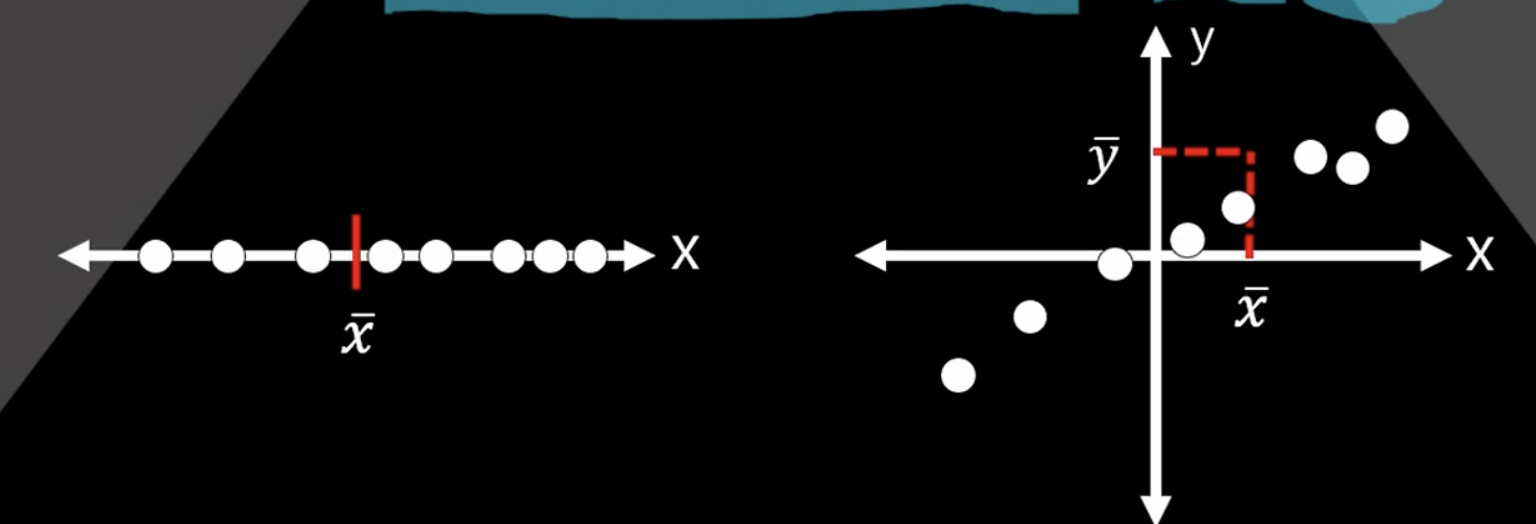

In [24]:
from IPython.display import Image
Image('image1.png')

In [25]:
U, S, V = np.linalg.svd(cov) # 특이값 분해

In [26]:
U # 공분산 행렬의 고유벡터(eigenvector) : 각 차원을 설명하는 방향

array([[-0.26110204, -0.33785022, -0.03526474, -0.07361304, -0.90056675],
       [-0.44064806,  0.00439595,  0.36140009, -0.80229708,  0.17753685],
       [-0.65877465,  0.41633287,  0.35204812,  0.51796788, -0.02131416],
       [-0.54693624, -0.43291006, -0.62520682,  0.09119143,  0.33800916],
       [ 0.06731814, -0.72463351,  0.59441141,  0.27256909,  0.20677455]])

In [27]:
S # 공분산 행렬의 고유값(eigenvalue) : 고유벡터의 방향으로의 데이터 분산 정도

array([1.29009461, 1.11905058, 0.92390964, 0.84016023, 0.62027372])

In [28]:
V # U와의 대칭 행렬

array([[-0.26110204, -0.44064806, -0.65877465, -0.54693624,  0.06731814],
       [-0.33785022,  0.00439595,  0.41633287, -0.43291006, -0.72463351],
       [-0.03526474,  0.36140009,  0.35204812, -0.62520682,  0.59441141],
       [-0.07361304, -0.80229708,  0.51796788,  0.09119143,  0.27256909],
       [-0.90056675,  0.17753685, -0.02131416,  0.33800916,  0.20677455]])

### 고유값, 고유벡터 예시 (by GPT)
- 고유벡터는 고유한 진동 방향을 가지는 스프링의 진동 모드와 같습니다.
- 스프링에 힘을 가하면 특정 방향으로 진동하게 되는데, 이 때 고유벡터는 그 진동 방향을 나타냅니다.
- 고유값은 진동의 크기, 즉 얼마나 진동하는지를 나타냅니다. 고유값이 크면 크게 진동하고, 고유값이 작으면 작게 진동합니다.

In [29]:
Xrot = np.dot(X, U) # decorrelate - 데이터를 새로운 좌표계로 변환하여 서로 상관관계가 없는 데이터로 만드는 것
Xrot

array([[-1.05244829e+00,  4.01392551e-01, -1.96209371e+00,
        -3.81467552e-01,  8.28548903e-01],
       [ 3.35802164e-01,  1.30924251e+00,  6.13230392e-01,
         6.08911152e-01,  3.90407441e-01],
       [ 6.50529834e-01,  4.27024614e-01, -1.47970074e+00,
        -2.51280524e-01,  8.63104200e-01],
       [-3.53278690e-02,  8.73578686e-01, -2.67223294e-01,
        -8.03982125e-01,  3.45311003e-01],
       [ 2.54810302e-01,  6.35445159e-02, -7.78276121e-01,
        -3.52050567e-01,  4.82725806e-01],
       [-1.12535590e+00, -1.89494873e-01, -8.95616694e-01,
         2.97778637e-01, -2.48389160e-01],
       [-1.48859238e+00, -9.53361697e-01,  7.45418369e-02,
         8.00494535e-02,  8.01457178e-01],
       [-1.48192919e-02,  5.60581423e-01, -1.20796357e+00,
         6.88860163e-01,  1.73916616e-01],
       [ 5.57125873e-01,  1.36724577e+00,  1.00021637e+00,
         1.29133155e+00, -4.91068117e-01],
       [-5.90890832e-01, -1.22642604e+00,  2.83060083e-01,
        -7.28010293e-01

- 고유벡터는 각각 데이터의 분산이 가장 큰 방향을 나타내는 벡터이다. 이 벡터들은 서로 직교하기 때문에, 이 벡터들로 구성된 행렬 U는 새로운 좌표계로 변환하는 역할을 한다.
- 위의 식은 데이터의 회전으로 이해할 수 있는데, 실제로는 데이터를 고유벡터가 나타내는 방향으로 재정렬하는 과정이다.
- 새로 생성된 Xrot는 서로 독립적인 방향을 나타내기 때문에, 이 데이터는 더 이상 서로 상관관계가 없다.

-> 데이터의 상관관계를 제거해 다양한 분석이나 모델에 사용할 때 더 효율적으로 처리할 수 있다.

In [30]:
Xrot_reduced = np.dot(X, U[:, :100]) # PCA - [N x D] -> [N x 100]
Xrot_reduced

array([[-1.05244829e+00,  4.01392551e-01, -1.96209371e+00,
        -3.81467552e-01,  8.28548903e-01],
       [ 3.35802164e-01,  1.30924251e+00,  6.13230392e-01,
         6.08911152e-01,  3.90407441e-01],
       [ 6.50529834e-01,  4.27024614e-01, -1.47970074e+00,
        -2.51280524e-01,  8.63104200e-01],
       [-3.53278690e-02,  8.73578686e-01, -2.67223294e-01,
        -8.03982125e-01,  3.45311003e-01],
       [ 2.54810302e-01,  6.35445159e-02, -7.78276121e-01,
        -3.52050567e-01,  4.82725806e-01],
       [-1.12535590e+00, -1.89494873e-01, -8.95616694e-01,
         2.97778637e-01, -2.48389160e-01],
       [-1.48859238e+00, -9.53361697e-01,  7.45418369e-02,
         8.00494535e-02,  8.01457178e-01],
       [-1.48192919e-02,  5.60581423e-01, -1.20796357e+00,
         6.88860163e-01,  1.73916616e-01],
       [ 5.57125873e-01,  1.36724577e+00,  1.00021637e+00,
         1.29133155e+00, -4.91068117e-01],
       [-5.90890832e-01, -1.22642604e+00,  2.83060083e-01,
        -7.28010293e-01

- U[:, :100]는 상위 100개의 고유벡터만을 선택한다. 
- 고유벡터들은 데이터의 가장 큰 분산을 설명하는 방향을 나타내므로, 이 상위 100개의 고유벡터만을 사용해 데이터를 줄여도 중요한 정보를 대부분 유지할 수 있다.

-> PCA를 통해 차원을 줄인 데이터는 학습 시간이 단축되며, 메모리 효율성이 높아지는 등의 이점이 있다.

In [31]:
Xrot_reduced2 = np.dot(X, U[:,:3])  # 상위 3개의 고유벡터만 선택
Xrot_reduced2.shape

(100, 3)

In [14]:
Xwhite = Xrot / np.sqrt(S + 1e-5) # Whitening: 데이터의 각 차원을 고유값으로 나누어 크기를 정규화하는 과정
Xwhite

array([[ 6.46925595e-01,  5.01113632e-01,  1.45359487e-01,
         4.85999533e-01,  5.78582631e-01],
       [ 7.47678095e-01, -4.09295891e-01,  3.56988002e-01,
        -1.52442249e-01,  9.35259237e-01],
       [ 6.05836883e-01, -8.63194712e-01,  1.68972911e+00,
        -3.76106390e-01, -1.12030640e+00],
       [-3.05673369e-01, -5.07051376e-01,  3.76094274e-02,
        -4.16042188e-01, -1.76095713e+00],
       [ 9.20137171e-01, -2.60533435e-01,  5.30515624e-01,
         1.14460842e+00,  2.29522370e+00],
       [-1.83489703e+00,  1.03501150e+00,  5.31748875e-01,
         1.47827349e+00,  3.10400795e-01],
       [-2.04224177e+00,  3.00710820e-01,  3.62675150e-02,
        -1.99440908e+00,  1.01480743e+00],
       [-6.09257690e-01, -2.21774087e+00, -1.08226800e+00,
         1.87732746e+00, -5.03505807e-01],
       [ 5.07682808e-01,  3.81881135e-01, -2.77915881e+00,
        -1.08254319e-01, -3.09766733e-01],
       [ 8.99350018e-01, -1.46387282e-01, -1.24722168e+00,
         9.72146318e-01

In [15]:
Xwhite.shape

(100, 5)